In [47]:
#imports
from awpy.parser import DemoParser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import scipy.stats as st
import seaborn as sns
import math

In [48]:
dir_path = r"C:\Users\Wessel\Documents\DataScienceDemos\demos"
out_path = r"C:\Users\Wessel\Documents\DataScienceDemos\JSON"

In [49]:
# parsing data
# for dem in os.listdir(dir_path):
#     demo_parser = DemoParser(demofile = dir_path+"/"+dem, demo_id = str(dem), parse_rate=128, outpath = out_path ).parse()

In [50]:
#importing data
games = []
for file in os.listdir(out_path):
    game = json.load(open(out_path+"/"+file))
    games.append(game) 

In [51]:
#generate list of unique maps in pool
maps = []
for game in games:
    if game['mapName'] not in maps:
        maps.append(game['mapName'])
print(maps)

['de_mirage', 'de_inferno', 'de_overpass', 'de_ancient', 'de_nuke', 'de_vertigo']


In [52]:
#init dict's of maps
map_dict_mouz = {}
map_dict_enemy = {}
avg_kills_mouz = {}
avg_kills_enemy = {}
stdef_map_dict_mouz = {}
stdef_map_dict_enemy = {}
conf_rate_kills = {}
win_dict = {}
loss_dict = {}
kill_dif = {}
win_dif = {}
stdef_loss_dict = {}
stdef_win_dict = {}
conf_rate_wins = {}
i=0
for k in maps:
    map_dict_mouz[maps[i]] = []
    map_dict_enemy[maps[i]] = []
    avg_kills_mouz[maps[i]] = []
    avg_kills_enemy[maps[i]] = []
    stdef_map_dict_mouz[maps[i]] = []
    stdef_map_dict_enemy[maps[i]] = []
    conf_rate_kills[maps[i]] = []
    win_dict[maps[i]] = []
    loss_dict[maps[i]] = []
    kill_dif[maps[i]] = []
    win_dif[maps[i]] = []
    stdef_loss_dict[maps[i]] = []
    stdef_win_dict[maps[i]] = []
    conf_rate_wins[maps[i]] = []
    i += 1

In [53]:
#fill dict's wits kills per round
for game in games:
    for gameround in game['gameRounds']:
        number_of_kills_mouz = 0
        number_of_kills_enemy = 0
        for kill in gameround['kills']:
            if kill['attackerTeam'] == "MOUZ":
                number_of_kills_mouz += 1
            if kill['attackerTeam'] != "MOUZ":
                number_of_kills_enemy += 1 
        map_dict_mouz[game['mapName']].append(number_of_kills_mouz) 
        map_dict_enemy[game['mapName']].append(number_of_kills_enemy)

print(map_dict_mouz)

{'de_mirage': [5, 5, 1, 4, 5, 5, 5, 3, 4, 4, 1, 5, 2, 2, 5, 1, 2, 0, 4, 2, 5, 2, 4, 5, 5, 5, 2, 1, 1, 5, 1, 3, 5, 5, 5, 0, 5, 2, 0, 0, 4, 0, 0, 5, 3, 4, 3, 1, 1, 3, 0, 4, 3, 2, 5, 3, 0, 2, 4, 5, 4, 2, 4, 5, 5, 5, 5, 5, 5, 5, 3, 4, 5, 5, 1, 0, 0, 3, 3, 1, 2, 5, 4, 5, 1, 5, 3, 5, 5, 2, 3, 5, 4, 5, 2, 3, 2, 1, 1, 0, 2, 3, 3, 5, 4, 1, 5, 5, 4, 3], 'de_inferno': [4, 3, 4, 2, 1, 2, 1, 1, 1, 5, 2, 4, 4, 1, 2, 3, 0, 1, 4, 4, 3, 5, 5, 4, 4, 1, 3, 5, 5, 5, 3, 2, 1, 3, 4, 4, 2, 1, 0, 2, 3, 5, 5, 5, 1, 3, 1, 2, 3, 5, 2, 1, 5, 3, 5, 5, 5, 5, 4, 4, 3, 4, 5, 5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 3, 3, 1, 5, 5, 5, 5, 5, 2, 3, 5, 1, 5, 2, 5, 3, 3, 3, 5, 1, 1, 0, 2, 3, 1, 1, 2, 3, 5, 5, 2, 1, 0, 2, 5, 0, 1, 0, 2, 1, 5, 2, 2, 2, 5, 3, 3, 0, 3, 1, 0, 2, 0, 0, 2, 5, 3, 3, 3, 2, 1, 2, 1, 5, 4, 0, 4, 3], 'de_overpass': [5, 5, 5, 2, 5, 5, 2, 4, 5, 1, 1, 1, 5, 5, 3, 5, 4, 5, 5, 2, 2, 3, 2, 2, 5, 1, 3, 2, 5, 0, 1, 1, 5, 4, 4, 5, 5, 3, 5, 5, 2, 1, 5, 5, 1, 0, 1, 2, 2, 2, 3, 0, 2, 2, 3, 5, 5, 0, 4, 2, 0, 3, 0, 5, 2, 1, 4

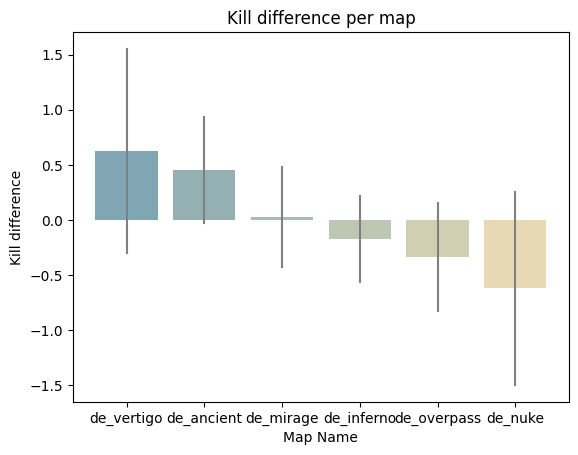

In [58]:
#get SD and n
i = 0
for k in map_dict_mouz:
    stdef_map_dict_mouz[maps[i]].append(np.mean(map_dict_mouz[maps[i]]))
    stdef_map_dict_mouz[maps[i]].append(np.std(map_dict_mouz[maps[i]]))
    stdef_map_dict_mouz[maps[i]].append(len(map_dict_mouz[maps[i]]))
    stdef_map_dict_enemy[maps[i]].append(np.mean(map_dict_enemy[maps[i]]))
    stdef_map_dict_enemy[maps[i]].append(np.std(map_dict_enemy[maps[i]]))
    stdef_map_dict_enemy[maps[i]].append(len(map_dict_enemy[maps[i]]))
    i+=1

#get SE(diff)
i = 0
for k in stdef_map_dict_mouz:
    conf_rate_kills[maps[i]].append(math.sqrt((pow(stdef_map_dict_mouz.get(maps[i])[1], 2)/ stdef_map_dict_mouz.get(maps[i])[2]) + (pow(stdef_map_dict_enemy.get(maps[i])[1], 2)/ stdef_map_dict_enemy.get(maps[i])[2])))
    conf_rate_kills[maps[i]].append(stdef_map_dict_mouz.get(maps[i])[0]-stdef_map_dict_enemy.get(maps[i])[0])
    conf_rate_kills[maps[i]].append(conf_rate_kills.get(maps[i])[1]-1.96*conf_rate_kills.get(maps[i])[0])
    conf_rate_kills[maps[i]].append(conf_rate_kills.get(maps[i])[1]+1.96*conf_rate_kills.get(maps[i])[0])
    i += 1
conf_rate_kills

#calculate 95% conf 
i = 0
conf_low = []
conf_high = []
for k in conf_rate_kills:
    conf_high.append(conf_rate_kills[maps[i]][3])
    conf_low.append(conf_rate_kills[maps[i]][2])
    i += 1

#make dict containing diff in kills and the conf rate to plot
i = 0
for k in stdef_map_dict_mouz:
    kill_dif[maps[i]].append(stdef_map_dict_mouz[k][0]-stdef_map_dict_enemy[k][0])
    kill_dif[maps[i]].append(conf_low[i]) 
    kill_dif[maps[i]].append(conf_high[i]) 
    i += 1
#sort on highest to lowest dif in kills
kill_dif = dict(sorted(kill_dif.items(), key=lambda x:x[1], reverse=True))

keys = list(kill_dif.keys())
values = list(kill_dif.values())
low = []
high = []
dif = []

i = 0
for k in values:
    dif.append(values[i][0]) 
    i+=1
i = 0
for k in values:
    low.append(values[i][1])
    i+= 1
i = 0
for k in values:
    high.append(values[i][2])
    i+= 1

#plot barplot 
ax = sns.barplot(x=keys, y=dif, palette="blend:#7AB,#EDA")
ax.set(xlabel='Map Name', ylabel='Kill difference', title='Kill difference per map')
ax
#plot errorbars
i = 0
for k in range(0, len(kill_dif)):
    plt.plot([i,i], [low[i], high[i]], color = 'grey')
    i += 1